In [1]:
import sys
print(sys.executable)

C:\Users\DHEERAJ\Desktop\heart disease prediction using machine learning\heart_venv\Scripts\python.exe


# Importing all the libraries and dependencies.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# important dependencies from scikit-learn ibrary.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import( accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve,auc)

# Loading Dataset and quick review of structure of data.

In [4]:
df=pd.read_csv("C:/Users/DHEERAJ/Desktop/heart disease prediction using machine learning/heart_data.csv")

In [5]:
# quick review of structure of data( by printing first five rows and last five rows).
# .head() method is use to print first five rows.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# .tail() method is used to print last five rows.
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# so shape method tells us the number of columns and rows data has.
df.shape

(303, 14)

In [8]:
# The number or rows are 303 and number of columns are 14. means we have 14 different labels with target label as well.

In [9]:
# getting some more info about data( by use decribe method we know the several things such as count, mean, standard deviation etc. for all the columns)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# getting some more information about data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# By use of isnull we could know if our data has any null values or not.
# How it Works?
# The isnull() function returns a boolean object of the same size and shape as the input data. 
# True indicates a missing or null value.
# False indicates a non-missing (valid) value. 

df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# isnull().sum() method return the null values present in column. as we can see that we got 0 in every column so we do not have any null values.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# As we know that we have 303 rows and by above info method we got to know that, we have 303 no-null values in all the 14 columns so this means that we do not have any null or missing values.
# so we dont need to handle missing and null values.
# and we have any null or missing values then we have two methods to handle these missing values imputation and dropping.
# In case of very large dataset we can go with dropping th rows method.
# in case of small dataset we prefered to go with imputation.
# Imputation is nothing but using some proper statistical values in place of missing values. Statistical values such as mean, median and mode . Mean , median and mode also alled as central tendencies.

# Central Tendencies:-

# Mean :- Average of all the values

# Median :-
# Odd case:- Arrange all the values in ascending order then middle value is the median.
# Even Case:- average of the two middle values will be considered as median.

# Mode:- the number with maximum frequency.


# Exploratory data analysis by correlation.

In [14]:
# exploratory data analysis by correlation.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


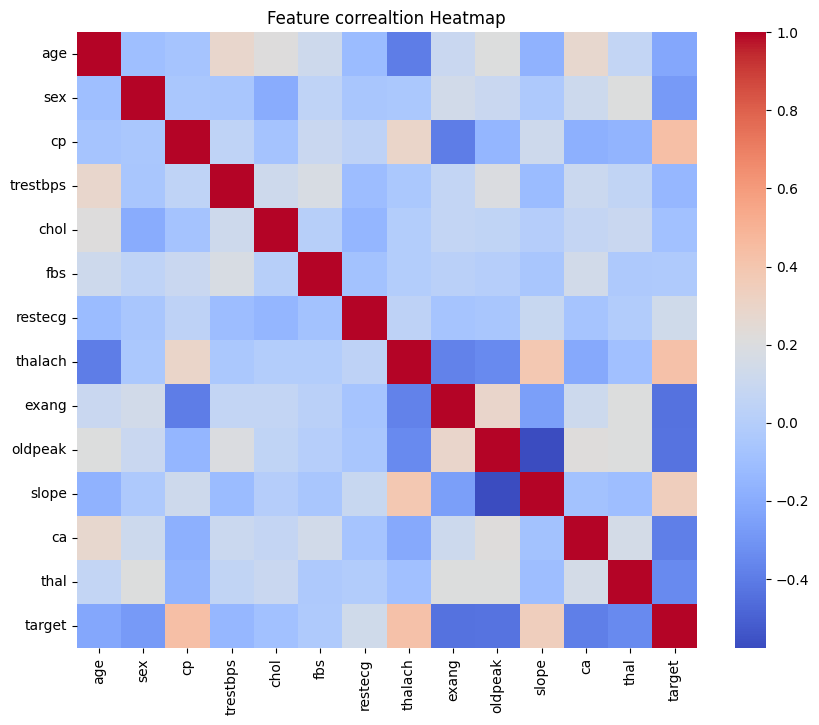

In [15]:
# exploratory data analysis.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature correaltion Heatmap")
plt.show()


In [16]:
# checking the distribution of a variable( like target variable).
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [17]:
# With above value_counts fucntion we got to know that target label has 165 people have haeart disease and 138 people does'nt have any heart disease.
# 1 -->  heart disease
# 0 -->  No heart disease
# if we talk about the distribution, it is also very fine it is nearly 50-50 % distribution(even distribution).
# This is good for this project but in real time we always have that kind of data whhich is not distributed equally or nearly equal.
# for those cases we need to do some processing in data.
# like undersampling or oversampling.

# Data preprocessing:-

In [18]:
# Splitting the features and targets.
x = df.drop("target", axis=1)
y = df["target"]  

In [19]:
# train-test split.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [20]:
# printing the shape of x, x_train and x_test.
print( x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


In [21]:
# check if our data has values in same range. to check this we have to check the standard deviation.
# if standard deviation is one or close to one then only we can say data is standardize.
print( x.std())

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
dtype: float64


In [22]:
# loading the StandardScaler function to a variable scaler.
scaler = StandardScaler()

In [23]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [24]:
print(x_train_scaled)

[[-1.35679832  0.72250438  0.00809909 ...  0.95390513 -0.68970073
  -0.50904773]
 [ 0.38508599  0.72250438 -0.97189094 ...  0.95390513 -0.68970073
   1.17848036]
 [-0.92132724  0.72250438  0.98808912 ... -0.69498803 -0.68970073
  -0.50904773]
 ...
 [ 1.58263146  0.72250438  1.96807914 ... -0.69498803  0.32186034
  -0.50904773]
 [-0.92132724  0.72250438 -0.97189094 ...  0.95390513 -0.68970073
   1.17848036]
 [ 0.92942484 -1.38407465  0.00809909 ...  0.95390513  1.33342142
  -0.50904773]]


In [25]:
print(x_test_scaled)

[[ 3.51938054e-01  5.20416500e-01 -8.17224232e-01  6.92350698e-01
   6.70698758e-01 -5.45776823e-01 -8.61891607e-01 -1.43822060e+00
   1.28536917e+00 -3.99335669e-01 -4.85744493e-01  7.31507170e-02
  -2.00597821e+00]
 [ 5.85288285e-01  5.20416500e-01  2.00451227e+00  1.72875297e+00
   9.21953360e-01 -5.45776823e-01 -8.61891607e-01  4.50638062e-01
  -7.77986605e-01 -6.92823330e-01 -4.85744493e-01 -8.19288030e-01
   9.42568077e-01]
 [ 3.51938054e-01  5.20416500e-01  1.06393343e+00  6.92350698e-01
  -2.46998376e+00  1.83225076e+00  1.16023870e+00  1.01327681e+00
  -7.77986605e-01 -6.92823330e-01  1.07375098e+00  7.31507170e-02
   9.42568077e-01]
 [ 2.35262938e-01 -1.92153785e+00 -8.17224232e-01 -1.36771119e-01
   3.45543726e+00 -5.45776823e-01 -8.61891607e-01  8.89417229e-02
   1.28536917e+00  5.54499228e-01 -4.85744493e-01  9.65589464e-01
   9.42568077e-01]
 [ 1.98538967e+00 -1.92153785e+00  1.06393343e+00 -1.38045385e+00
   4.40382040e-01  1.83225076e+00 -8.61891607e-01 -7.14827921e-01


In [26]:
print(x_train_scaled.std())

1.0


In [27]:
print(x_test_scaled.std())

1.0


In [28]:
# in above x_train_scaled and x_test_scaled we can see that the standard deviation is one and this means that our data is scaled and standardized.

In [29]:
# Model definations.
models={
    "LogisticRegression": LogisticRegression(max_iter =1000),
    "SVM": SVC(kernel = "linear", probability= True),
    "DecisionTree" : DecisionTreeClassifier(max_depth=5 , random_state= 42),
    "Random forest" : RandomForestClassifier(n_estimators =100, random_state=42),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}
Results = []                                           

# Training and Evaluation.



In [30]:
 # models training
for name, model in models.items():
    model.fit(x_train_scaled,y_train)
    
    # Model prediction on training data.
    x_train_pred = model.predict(x_train_scaled)

    # Model prediction on testin data.
    x_test_pred = model.predict(x_test_scaled)

    Results.append({
    "model" : name,
    " Training Accuracy" : accuracy_score(y_train, x_train_pred),
    " Testing Accuracy" : accuracy_score(y_test, x_test_pred),
    " Precision" : precision_score(y_test, x_test_pred),
    " Recall" : recall_score(y_test, x_test_pred),
    " F1-Score" : f1_score(y_test, x_test_pred)
    })
Result_df = pd.DataFrame(Results)
print("\nModel Performance Metrics: \n")
print(Result_df)
    


Model Performance Metrics: 

                model   Training Accuracy   Testing Accuracy   Precision  \
0  LogisticRegression            0.863636           0.885246    0.878788   
1                 SVM            0.876033           0.885246    0.878788   
2        DecisionTree            0.909091           0.852459    0.810811   
3       Random forest            1.000000           0.852459    0.848485   
4                 KNN            0.855372           0.901639    0.906250   
5         Naive Bayes            0.818182           0.885246    0.878788   
6   Gradient Boosting            1.000000           0.803279    0.833333   

    Recall   F1-Score  
0  0.90625   0.892308  
1  0.90625   0.892308  
2  0.93750   0.869565  
3  0.87500   0.861538  
4  0.90625   0.906250  
5  0.90625   0.892308  
6  0.78125   0.806452  


In [31]:
# fix column name Safely (permanent solution):-
Result_df.columns = Result_df.columns.str.strip()

In [32]:
# correct capitaliztion:-
Result_df.rename(columns={"model": "Model"}, inplace= True)

In [33]:
print(Result_df.columns)

Index(['Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall',
       'F1-Score'],
      dtype='object')


# Performance Bar Plot

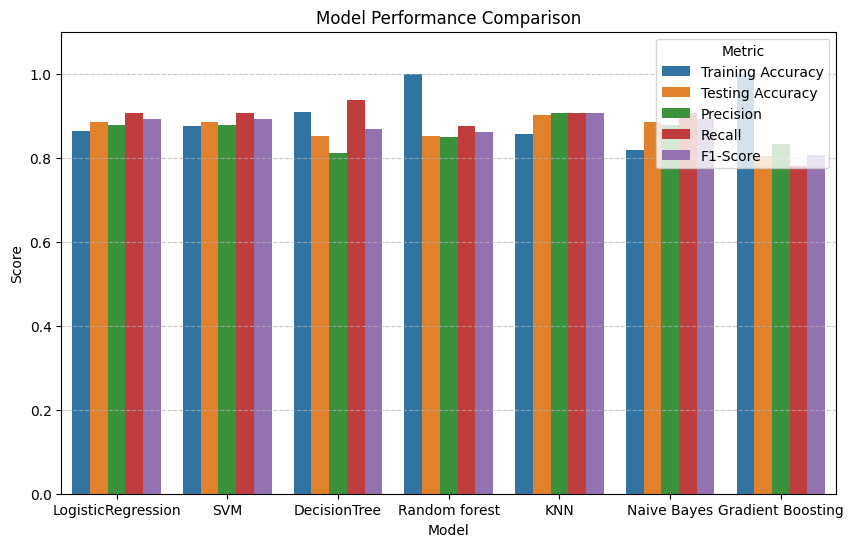

In [34]:
df_plot = Result_df.melt(id_vars="Model", var_name="Metric", value_name = "Score")

plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x="Model" , y="Score" , hue="Metric")
plt.title("Model Performance Comparison")
plt.ylim(0,1.1)
plt.grid(axis="y", linestyle="--", alpha= 0.7)
plt.show()

# Confusion Matrix

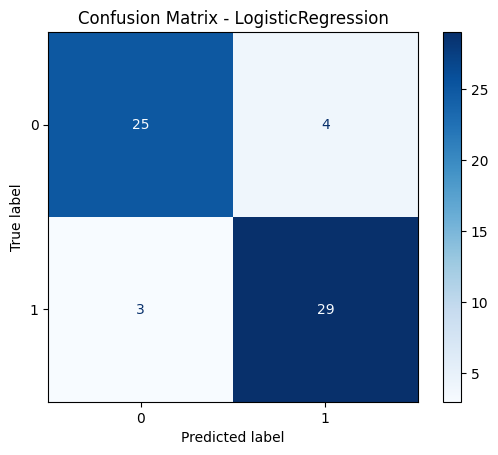

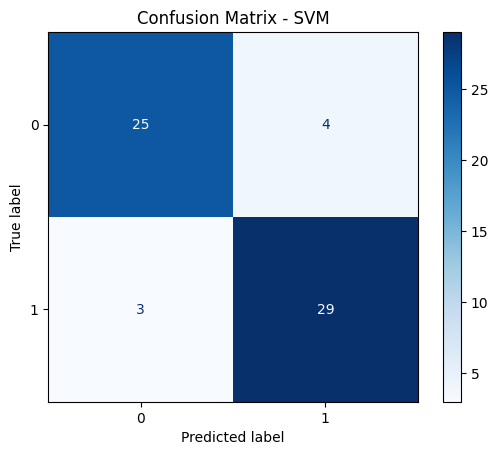

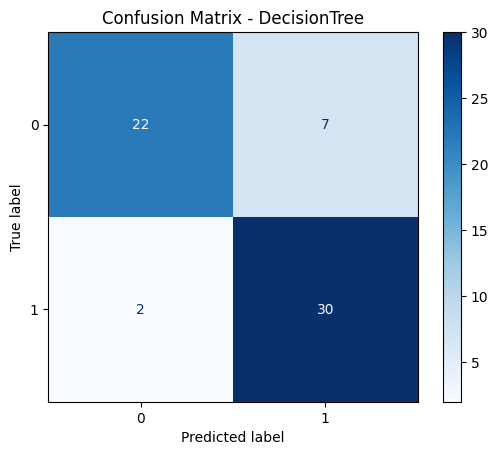

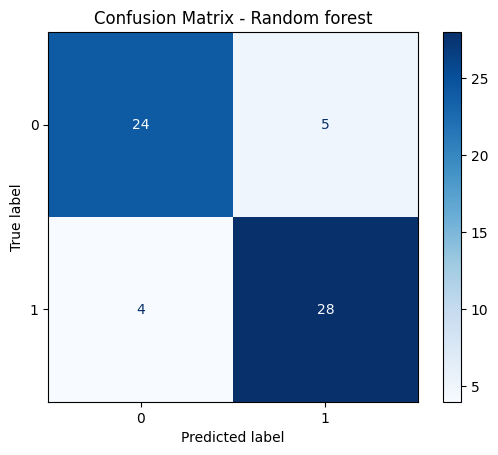

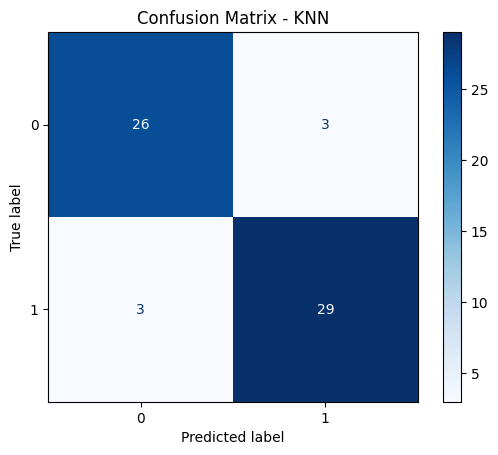

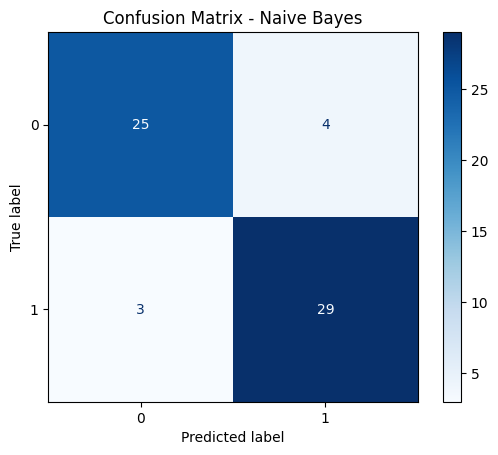

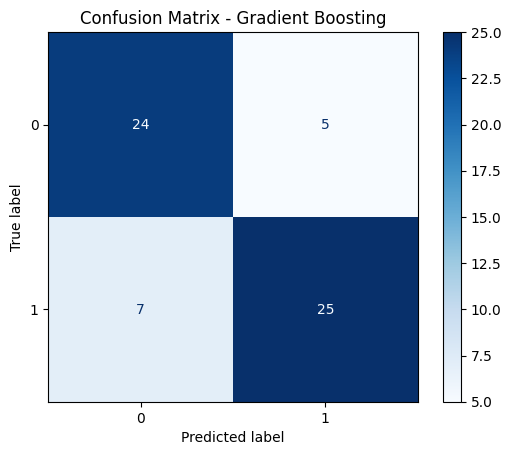

In [35]:
for name, model in models.items():
    x_test_pred= model.predict(x_test_scaled)
    cm= confusion_matrix(y_test, x_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# ROC CURVE & AUC

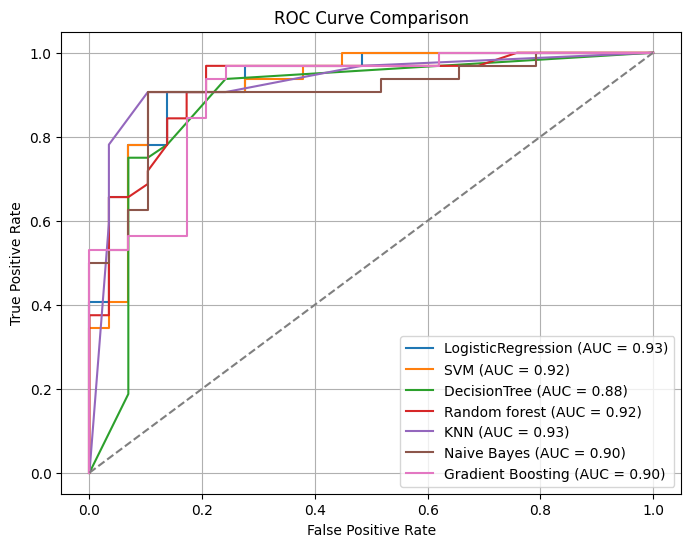

In [36]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# TRAIN VS TEST ACCURACY


In [37]:
print("\nTrain vs Test Accuracy:\n")
for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(x_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(x_test_scaled))
    print(f"{name} → Train: {train_acc:.3f}, Test: {test_acc:.3f}")


Train vs Test Accuracy:

LogisticRegression → Train: 0.864, Test: 0.885
SVM → Train: 0.876, Test: 0.885
DecisionTree → Train: 0.909, Test: 0.852
Random forest → Train: 1.000, Test: 0.852
KNN → Train: 0.855, Test: 0.902
Naive Bayes → Train: 0.818, Test: 0.885
Gradient Boosting → Train: 1.000, Test: 0.803


# CROSS-VALIDATION SCORES

In [38]:
print("\nCross-Validation Accuracy (5-Fold):\n")
for name, model in models.items():
    cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
    print(f"{name} → Mean CV Accuracy: {cv_scores.mean():.3f}")


Cross-Validation Accuracy (5-Fold):

LogisticRegression → Mean CV Accuracy: 0.818
SVM → Mean CV Accuracy: 0.814
DecisionTree → Mean CV Accuracy: 0.752
Random forest → Mean CV Accuracy: 0.806
KNN → Mean CV Accuracy: 0.814
Naive Bayes → Mean CV Accuracy: 0.789
Gradient Boosting → Mean CV Accuracy: 0.810


# Building a prediction system:-

In [42]:
final_model = models["LogisticRegression"]
def predict_heart_disease():
    print("\n--- Heart Disease Prediction System ---\n")

    user_data = []

    for col in x.columns:
        value = float(input(f"Enter {col}: "))
        user_data.append(value)

    user_data = np.array(user_data).reshape(1, -1)

    # Scale input using SAME scaler
    user_data_scaled = scaler.transform(user_data)

    # Make prediction
    prediction = final_model.predict(user_data_scaled)[0]
    probability = final_model.predict_proba(user_data_scaled)[0][1]

    print("\n--- Prediction Result ---")

    if prediction == 1:
        print("⚠️ High Risk: Heart Disease Detected")
    else:
        print("✅ Low Risk: No Heart Disease Detected")

    print(f"Risk Probability: {probability*100:.2f}%")
predict_heart_disease()


--- Heart Disease Prediction System ---



Enter age:  55
Enter sex:  1
Enter cp:  2
Enter trestbps:  140
Enter chol:  240
Enter fbs:  0
Enter restecg:  1
Enter thalach:  150
Enter exang:  0
Enter oldpeak:  1.2
Enter slope:  2
Enter ca:  0
Enter thal:  2



--- Prediction Result ---
⚠️ High Risk: Heart Disease Detected
Risk Probability: 93.73%


C:\Users\DHEERAJ\Desktop\heart disease prediction using machine learning\heart_venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
